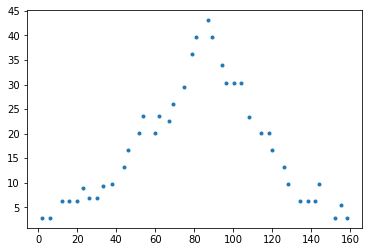

In [20]:
import numpy as np
import matplotlib.pyplot as plt

ydata=[]
xdata=[]
f=open("perfil(seed2).txt","r")

for i in range(40):
    list=f.readline().split()
    if(list[1]!='0'):
        xdata.append(float(list[0]))
        ydata.append(float(list[1]))

# for i in range(len(ydata)):
#     print(xdata[i],"\t",ydata[i])
plt.figure()
plt.plot(xdata,ydata,".")
plt.show()

In [75]:
from scipy.optimize import curve_fit

def func(x,m,b):
    return m*x+b

def Rsqrt(xdata,ydata,popt):
    arr=np.array(xdata)
    residuals=ydata-func(arr,popt[0],popt[1])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    return 1 - (ss_res / ss_tot)

def fit(xi,xf,m0,b0):
    x=[i for i in xdata if(i>xi and i<xf)]
    y=[i for i in ydata if(xdata[ydata.index(i)]>xi and xdata[ydata.index(i)]<xf)]
    
    popt,pcov=curve_fit(func,x,y,p0=(m0,b0))
    m0=popt[0] 
    dm0=np.sqrt(pcov[0][0])
    b0=popt[1]
    db0=np.sqrt(pcov[1][1])
    
    R=Rsqrt(x,y,popt)
    
    return [m0,b0],R

def mid_point(xdata,ydata):
    

Recta izquierda:
y= 0.43068326763329134 x+ -2.2704593012801197
θ₁= 0.4066745611264098
Recta derecha:
y= -0.5162927907978646 x+ 80.43975616214911
θ₂= 0.47659672222913263

Ángulo θ= 0.44163564167777125


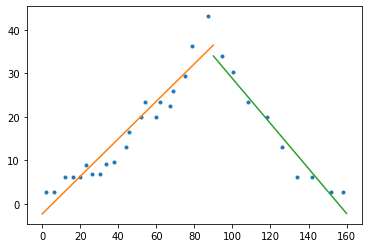

In [77]:
xm=90
xarr0=np.arange(0,xm,0.01)
xarr1=np.arange(xm,160,0.01)

[m0,b0],R0=fit(0,xm,0,0)[0],fit(0,xm,0,0)[1]
[m1,b1],R1=fit(xm,160,0,0)[0],fit(xm,160,0,0)[1]

print("Recta izquierda:")
print("y=",m0,"x+",b0)
print("\u03B8\u2081=",np.arctan(m0))
print("Recta derecha:")
print("y=",m1,"x+",b1)
print("\u03B8\u2082=",-np.arctan(m1))
print()
print("Ángulo \u03B8=",1/2*(np.arctan(m0)-np.arctan(m1)))

plt.figure()
plt.plot(xdata,ydata,".")
plt.plot(xarr0,m0*xarr0+b0,"-")
plt.plot(xarr1,m1*xarr1+b1,"-")
plt.show()